In [667]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [668]:
df1 = pd.read_csv("Bengaluru_House_Data.csv")
df1.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [669]:
print(df1.shape)

(13320, 9)


In [670]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis = 'columns')

In [671]:
df2.head()


location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

In [672]:
# check if there is null elements
df2.isnull().sum()


location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [673]:
# delete all rows that contains missing values
df3 = df2.dropna()

In [674]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [675]:
df3.shape

(13246, 5)

In [676]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [677]:
df3['Bedrooms'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\dell\AppData\Local\Temp\ipykernel_23292\1879338596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Bedrooms'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [678]:
df3.head()

location       size total_sqft  bath   price  Bedrooms
0  Electronic City Phase II      2 BHK       1056   2.0   39.07         2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00         4
2               Uttarahalli      3 BHK       1440   2.0   62.00         3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00         3
4                  Kothanur      2 BHK       1200   2.0   51.00         2

In [679]:
df3['Bedrooms'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [680]:
df3.head(5000)

location       size total_sqft  bath   price  Bedrooms
0     Electronic City Phase II      2 BHK       1056   2.0   39.07         2
1             Chikka Tirupathi  4 Bedroom       2600   5.0  120.00         4
2                  Uttarahalli      3 BHK       1440   2.0   62.00         3
3           Lingadheeranahalli      3 BHK       1521   3.0   95.00         3
4                     Kothanur      2 BHK       1200   2.0   51.00         2
...                        ...        ...        ...   ...     ...       ...
5028               Vijayanagar      1 BHK        606   1.0   40.00         1
5029    Gollarapalya Hosahalli      2 BHK        861   2.0   34.50         2
5030       Devarachikkanahalli      2 BHK       1170   2.0   40.00         2
5031               Koramangala      4 BHK       2461   6.0  353.00         4
5032              Marathahalli      2 BHK       1205   2.0   75.00         2

[5000 rows x 6 columns]

In [681]:
df3[df3.Bedrooms>20]

location        size total_sqft  bath  price  Bedrooms
1718  2Electronic City Phase II      27 BHK       8000  27.0  230.0        27
4684                Munnekollal  43 Bedroom       2400  40.0  660.0        43

In [682]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True 


In [683]:
df3[~df3['total_sqft'].apply(is_float)]

location   size   total_sqft  bath    price  Bedrooms
30              Yelahanka  4 BHK  2100 - 2850   4.0  186.000         4
122                Hebbal  4 BHK  3067 - 8156   4.0  477.000         4
137    8th Phase JP Nagar  2 BHK  1042 - 1105   2.0   54.005         2
165              Sarjapur  2 BHK  1145 - 1340   2.0   43.490         2
188              KR Puram  2 BHK  1015 - 1540   2.0   56.800         2
...                   ...    ...          ...   ...      ...       ...
12975          Whitefield  2 BHK   850 - 1060   2.0   38.190         2
12990      Talaghattapura  3 BHK  1804 - 2273   3.0  122.000         3
13059              Harlur  2 BHK  1200 - 1470   2.0   72.760         2
13265               Hoodi  2 BHK  1133 - 1384   2.0   59.135         2
13299          Whitefield  4 BHK  2830 - 2882   5.0  154.500         4

[190 rows x 6 columns]

In [684]:
df3['total_sqft'].dtype

dtype('O')

In [685]:
def convert_sting_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [686]:
convert_sting_to_num('2166')

2166.0

In [687]:
convert_sting_to_num('1000-2000')

1500.0

In [688]:
convert_sting_to_num('2000 Sqrt Meter')

In [689]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sting_to_num)

In [690]:
df4['total_sqft'].dtype

dtype('float64')

In [691]:
df3.loc[672]

location      Bettahalsoor
size             4 Bedroom
total_sqft     3090 - 5002
bath                   4.0
price                445.0
Bedrooms                 4
Name: 672, dtype: object

In [692]:
df5 = df4.copy()
df5.head()

location       size  total_sqft  bath   price  Bedrooms
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07         2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00         4
2               Uttarahalli      3 BHK      1440.0   2.0   62.00         3
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00         3
4                  Kothanur      2 BHK      1200.0   2.0   51.00         2

In [693]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

location       size  total_sqft  bath   price  Bedrooms  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07         2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00         4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00         3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00         3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00         2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [694]:
len(df5.location.unique())

1304

In [695]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [696]:
len(location_stats[location_stats <= 10])

1052

In [697]:
location_stats_less_than_10 = location_stats[location_stats <= 10]

In [698]:
df5.location = df5.location.apply(lambda x:'others' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [699]:
len(df5[(df5.total_sqft / df5.Bedrooms) < 300 ] )


744

In [700]:
df6 = df5[~(df5.total_sqft / df5.Bedrooms < 300) ] 

In [701]:
df6.shape

(12502, 7)

In [702]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [703]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft > (m - std)) & (subdf.price_per_sqft < (m + std))]
        df_out = pd.concat([df_out,reduced_df], ignore_index = True)
    return df_out

In [704]:
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

In [705]:
df7.price_per_sqft.describe()

count    10241.000000
mean      5657.702572
std       2266.476980
min       1250.000000
25%       4244.762955
50%       5172.413793
75%       6426.099852
max      24509.803922
Name: price_per_sqft, dtype: float64

In [706]:
def plot_scatter_chart(df,location):
    two_bedrooms = df[(df.location == location) & (df.Bedrooms == 2)]
    three_bedrooms = df[(df.location == location) & (df.Bedrooms == 3)]
    matplotlib.rcParams["figure.figsize"] = (15,10)
    plt.scatter(two_bedrooms.total_sqft,two_bedrooms.price_per_sqft,color = 'blue',label = "2 Bedrooms" , s = 50 )
    plt.scatter(three_bedrooms.total_sqft,three_bedrooms.price_per_sqft,marker = '+',color = 'red',label = "3 Bedrooms" , s = 50 )
    plt.xlabel("Total Square feet Area")
    plt.ylabel("Price per Square Feet")
    plt.title(location)
    plt.legend()

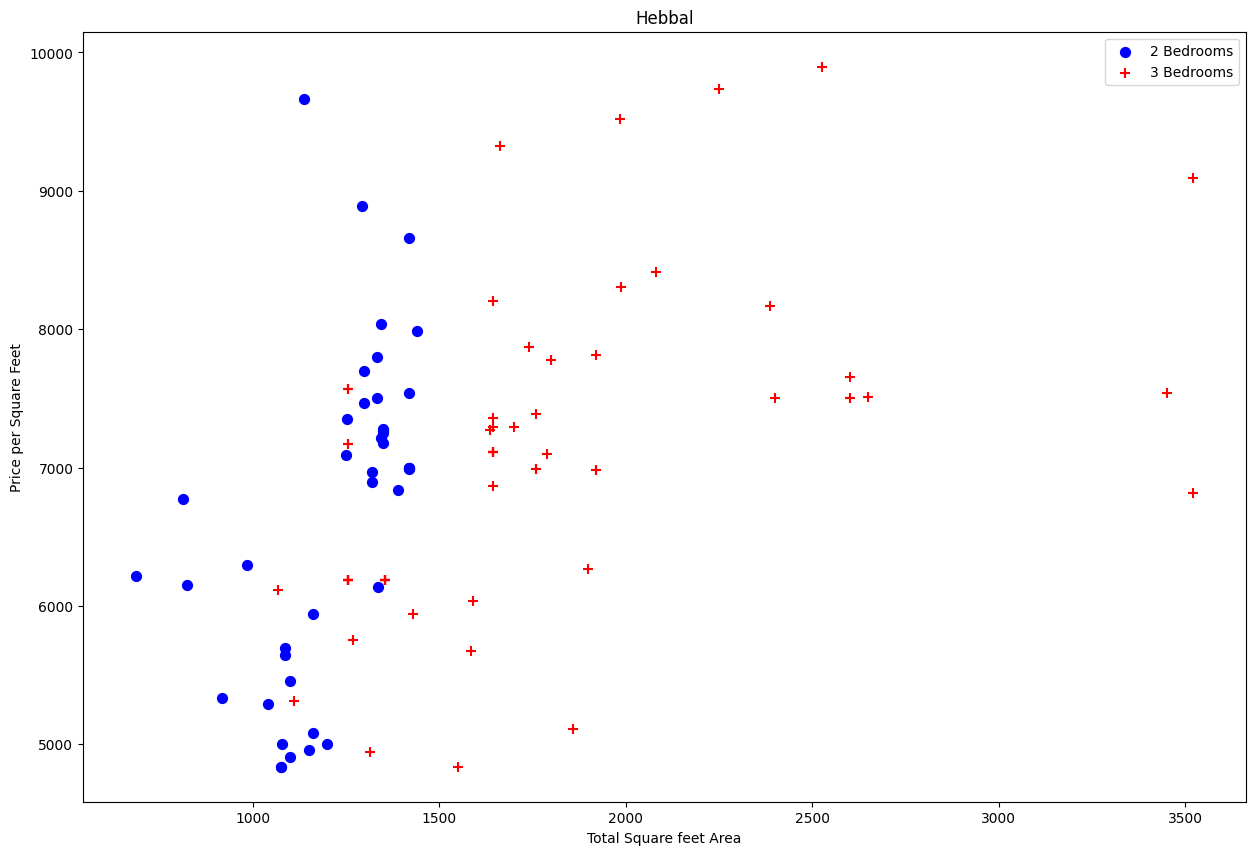

In [707]:
plot_scatter_chart(df7,"Hebbal")

We Should also remove properties where for same location, the price of(for example) 3 bedrooms appartment is less than 2 bedroom appartment(with the same square ft area). What we will do is for a given location, we will build a dictionary of stats per bedroom

Now we can remove those 2 bedrooms apartments whose price_per_sqft is less than the mean price_per_sqft of 1 bedroom appartment 

In [708]:
def remove_bedrooms_outliers(df):
    exclusive_indices = np.array([])
    bedrooms_stats = {}  
    for location, location_df in df.groupby('location'):
        for bedrooms, bedrooms_df in location_df.groupby('Bedrooms'):
            bedrooms_stats[bedrooms] = {
                'mean': np.mean(bedrooms_df.price_per_sqft),
                'std': np.std(bedrooms_df.price_per_sqft),
                'count': bedrooms_df.shape[0]
            }
        for bedrooms, bedrooms_df in location_df.groupby('Bedrooms'):
            stats = bedrooms_stats.get(bedrooms - 1)
            if stats and stats['count'] > 5:
                exclusive_indices = np.append(exclusive_indices, bedrooms_df[bedrooms_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclusive_indices, axis='index') 


df8 = remove_bedrooms_outliers(df7)
df8.shape


(7308, 7)

lets plot the above graph again to see what changed

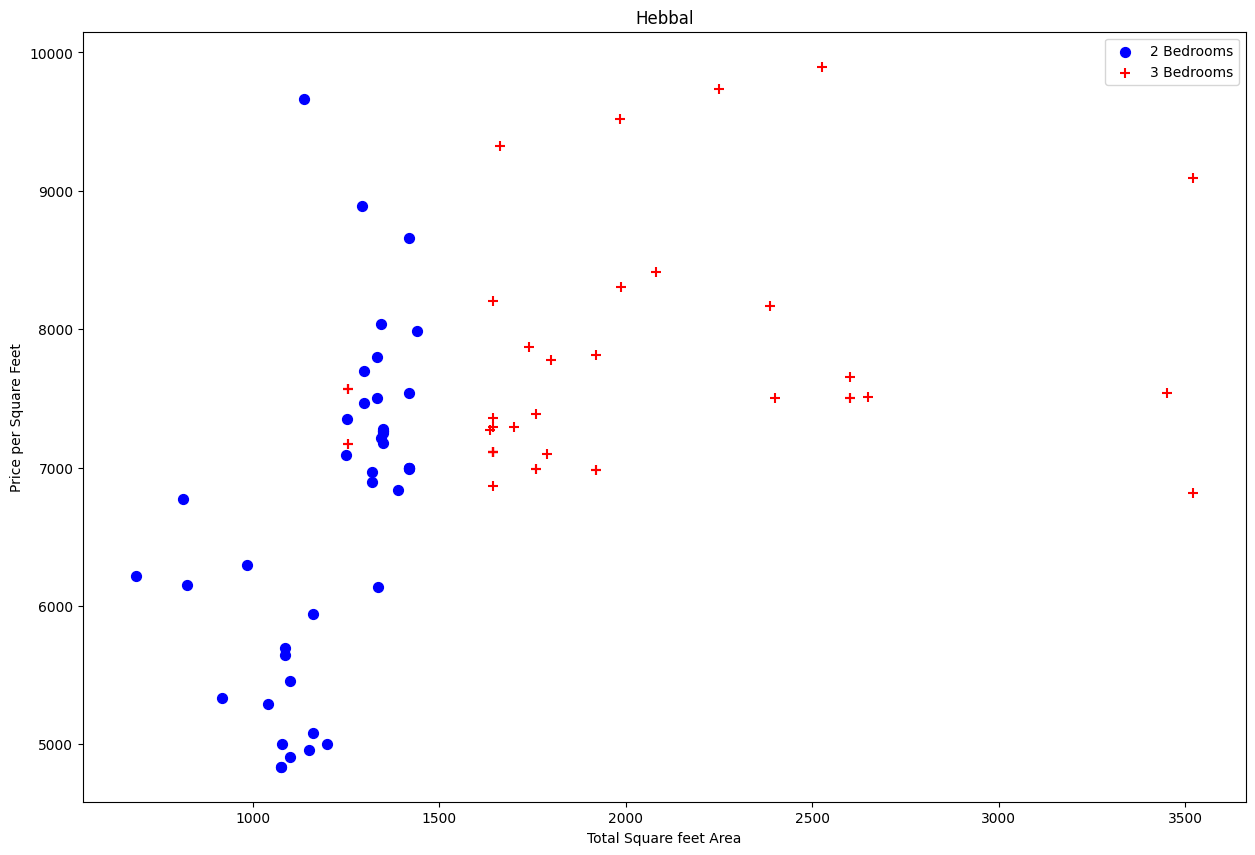

In [709]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'Count')

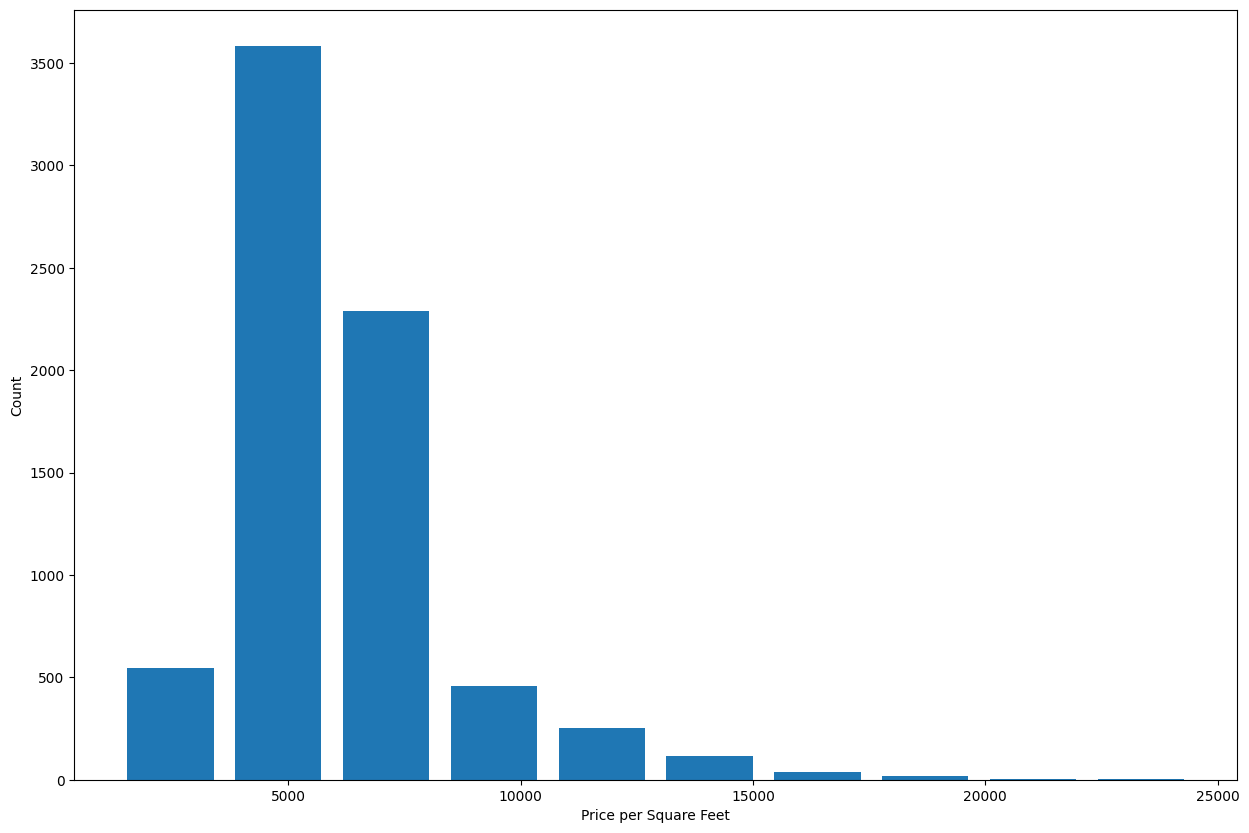

In [710]:
plt.hist(df8.price_per_sqft,rwidth = 0.8)
plt.xlabel("Price per Square Feet")
plt.ylabel("Count")

In [711]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [712]:
df8[df8.bath > 10 ]

location    size  total_sqft  bath  price  Bedrooms  \
5277  Neeladri Nagar  10 BHK      4000.0  12.0  160.0        10   
8486          others  10 BHK     12000.0  12.0  525.0        10   
8575          others  16 BHK     10000.0  16.0  550.0        16   
9308          others  11 BHK      6000.0  12.0  150.0        11   
9639          others  13 BHK      5425.0  13.0  275.0        13   

      price_per_sqft  
5277     4000.000000  
8486     4375.000000  
8575     5500.000000  
9308     2500.000000  
9639     5069.124424

Text(0, 0.5, 'Count')

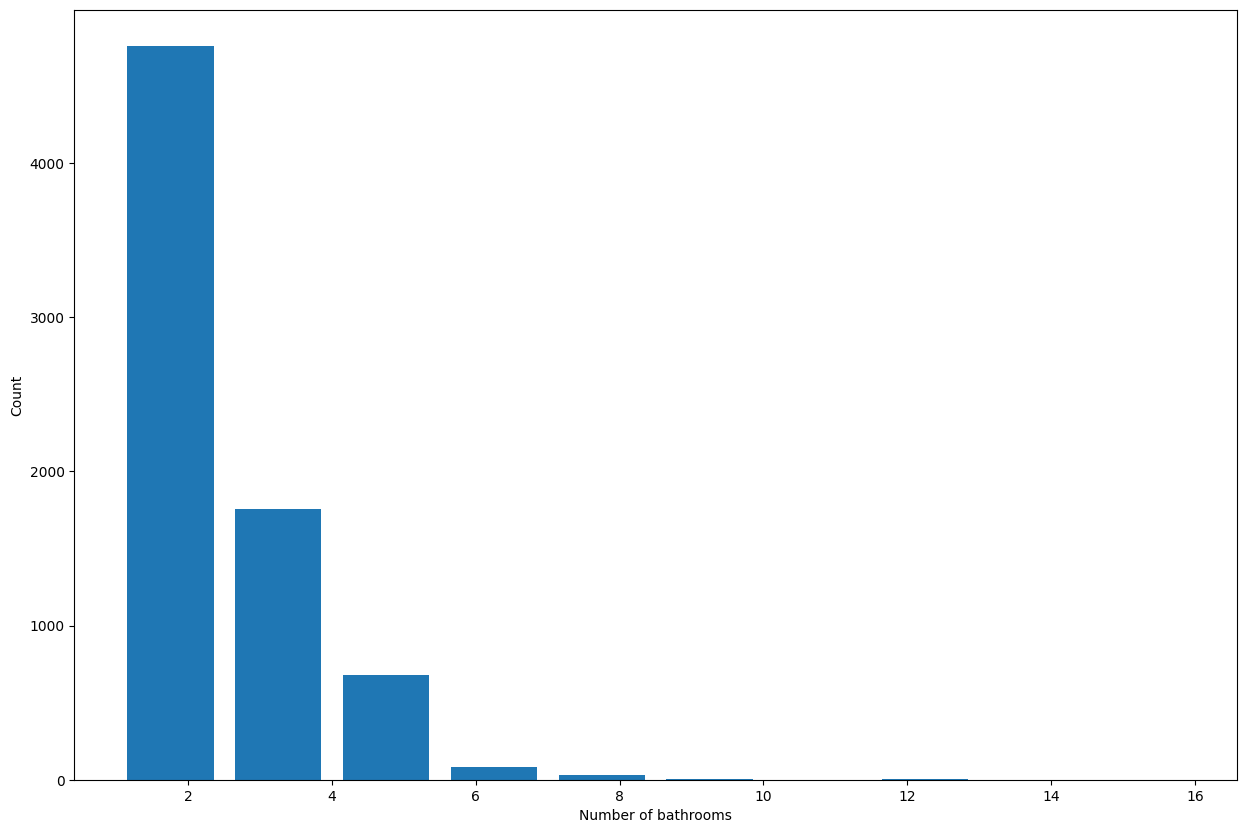

In [713]:
plt.hist(df8.bath,rwidth = 0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")


its also unusual that number of bath rooms is greater than number of rooms + 2 , so these can be considered as outliers
some outliers depend on the country, the opinion of the customer etc

In [714]:
df8[df8.bath > df8.Bedrooms + 2]


location       size  total_sqft  bath   price  Bedrooms  \
1626  Chikkabanavar  4 Bedroom      2460.0   7.0    80.0         4   
5238     Nagasandra  4 Bedroom      7000.0   8.0   450.0         4   
6711    Thanisandra      3 BHK      1806.0   6.0   116.0         3   
8411         others      6 BHK     11338.0   9.0  1000.0         6   

      price_per_sqft  
1626     3252.032520  
5238     6428.571429  
6711     6423.034330  
8411     8819.897689

In [715]:
df9 = df8[df8.bath < df8.Bedrooms + 2]

In [716]:
df9.shape


(7230, 7)

Now, our data is much neat and clean, so now we can start preparing it for machine learning training, and for that we are going to 
delete unnecessary features. size feature can be deleted because we already have the bedrooms feature that contain the same info 
same for price_per_sqft , since we have the total_sqft, we use this feature only for outlier detection


In [717]:
df10 = df9.drop(['price_per_sqft','size'], axis = 'columns')

In [718]:
df10.head(20)


location  total_sqft  bath  price  Bedrooms
0   1st Block Jayanagar      2850.0   4.0  428.0         4
1   1st Block Jayanagar      1630.0   3.0  194.0         3
2   1st Block Jayanagar      1875.0   2.0  235.0         3
3   1st Block Jayanagar      1200.0   2.0  130.0         3
4   1st Block Jayanagar      1235.0   2.0  148.0         2
5   1st Block Jayanagar      2750.0   4.0  413.0         4
6   1st Block Jayanagar      2450.0   4.0  368.0         4
8    1st Phase JP Nagar      1875.0   3.0  167.0         3
9    1st Phase JP Nagar      1500.0   5.0   85.0         5
10   1st Phase JP Nagar      2065.0   4.0  210.0         3
12   1st Phase JP Nagar      2059.0   3.0  225.0         3
13   1st Phase JP Nagar      1394.0   2.0  100.0         2
14   1st Phase JP Nagar      1077.0   2.0   93.0         2
15   1st Phase JP Nagar      1566.0   2.0  180.0         2
16   1st Phase JP Nagar       840.0   2.0   50.0         1
17   1st Phase JP Nagar      1590.0   3.0  131.0         3
18   1st Phase JP Nagar      2180.0   3.0  210.0         3
19   1st Phase JP Nagar      1180.0   2.0   88.5         2
20   1st Phase JP Nagar      1200.0   2.0   86.0         2
21   1st Phase JP Nagar      1394.0   2.0   85.0         2

In [719]:
df10

location  total_sqft  bath  price  Bedrooms
0      1st Block Jayanagar      2850.0   4.0  428.0         4
1      1st Block Jayanagar      1630.0   3.0  194.0         3
2      1st Block Jayanagar      1875.0   2.0  235.0         3
3      1st Block Jayanagar      1200.0   2.0  130.0         3
4      1st Block Jayanagar      1235.0   2.0  148.0         2
...                    ...         ...   ...    ...       ...
10232               others      1200.0   2.0   70.0         2
10233               others      1800.0   1.0  200.0         1
10236               others      1353.0   2.0  110.0         2
10237               others       812.0   1.0   26.0         1
10240               others      3600.0   5.0  400.0         4

[7230 rows x 5 columns]

many machine learning models such as linear regression, can't handle categorical features such as location
for reason we are going to convert this categorical data(location) to binary value, using one hot encoding 
we can use this command below to do one hot encoding 

In [720]:
dummies = pd.get_dummies(df10.location)
dummies.head(10)

1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                  True               False                      False   
1                  True               False                      False   
2                  True               False                      False   
3                  True               False                      False   
4                  True               False                      False   
5                  True               False                      False   
6                  True               False                      False   
8                 False                True                      False   
9                 False                True                      False   
10                False                True                      False   

    2nd Stage Nagarbhavi  5th Block Hbr Layout  5th Phase JP Nagar  \
0                  False                 False               False   
1                  False                 False               False   
2                  False                 False               False   
3                  False                 False               False   
4                  False                 False               False   
5                  False                 False               False   
6                  False                 False               False   
8                  False                 False               False   
9                  False                 False               False   
10                 False                 False               False   

    6th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
0                False               False               False   
1                False               False               False   
2                False               False               False   
3                False               False               False   
4                False               False               False   
5                False               False               False   
6                False               False               False   
8                False               False               False   
9                False               False               False   
10               False               False               False   

    9th Phase JP Nagar  ...  Vishveshwarya Layout  Vishwapriya Layout  \
0                False  ...                 False               False   
1                False  ...                 False               False   
2                False  ...                 False               False   
3                False  ...                 False               False   
4                False  ...                 False               False   
5                False  ...                 False               False   
6                False  ...                 False               False   
8                False  ...                 False               False   
9                False  ...                 False               False   
10               False  ...                 False               False   

    Vittasandra  Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  \
0         False       False           False      False               False   
1         False       False           False      False               False   
2         False       False           False      False               False   
3         False       False           False      False               False   
4         False       False           False      False               False   
5         False       False           False      False               False   
6         False       False           False      False               False   
8         False       False           False      False               False   
9         False       False           False      False               False   
10        False       False           False      False               False   

    Yelenahalli  Yeshwanthpu

In [721]:
df11 = pd.concat([df10,dummies],axis = "columns")

In [722]:
df11.head(10)

location  total_sqft  bath  price  Bedrooms  \
0   1st Block Jayanagar      2850.0   4.0  428.0         4   
1   1st Block Jayanagar      1630.0   3.0  194.0         3   
2   1st Block Jayanagar      1875.0   2.0  235.0         3   
3   1st Block Jayanagar      1200.0   2.0  130.0         3   
4   1st Block Jayanagar      1235.0   2.0  148.0         2   
5   1st Block Jayanagar      2750.0   4.0  413.0         4   
6   1st Block Jayanagar      2450.0   4.0  368.0         4   
8    1st Phase JP Nagar      1875.0   3.0  167.0         3   
9    1st Phase JP Nagar      1500.0   5.0   85.0         5   
10   1st Phase JP Nagar      2065.0   4.0  210.0         3   

    1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                  True               False                      False   
1                  True               False                      False   
2                  True               False                      False   
3                  True               False                      False   
4                  True               False                      False   
5                  True               False                      False   
6                  True               False                      False   
8                 False                True                      False   
9                 False                True                      False   
10                False                True                      False   

    2nd Stage Nagarbhavi  5th Block Hbr Layout  ...  Vishveshwarya Layout  \
0                  False                 False  ...                 False   
1                  False                 False  ...                 False   
2                  False                 False  ...                 False   
3                  False                 False  ...                 False   
4                  False                 False  ...                 False   
5                  False                 False  ...                 False   
6                  False                 False  ...                 False   
8                  False                 False  ...                 False   
9                  False                 False  ...                 False   
10                 False                 False  ...                 False   

    Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                False        False       False           False      False   
1                False        False       False           False      False   
2                False        False       False           False      False   
3                False        False       False           False      False   
4                False        False       False           False      False   
5                False        False       False           False      False   
6                False        False       False           False      False   
8                False        False       False           False      False   
9                False        False       False           False      False   
10               False        False       False           False      False   

    Yelahanka New Town  Yelenahalli  Yeshwanthpur  others  
0                False        False         False   False  
1                False        False         False   False  
2                False        False         False   False  
3                False        False         False   False  
4                False        False         False   False  
5                False        False         False   False  
6                False        False         False   False  
8                False        False         False   False  
9                False        False         False   False  
10               False        False         False   False  

[10 rows x 247 columns]

since we have many columns in location, deleting the last column"other" will not affect the result 

In [723]:
df12 = df11.drop(['others'],axis="columns")
df12

location  total_sqft  bath  price  Bedrooms  \
0      1st Block Jayanagar      2850.0   4.0  428.0         4   
1      1st Block Jayanagar      1630.0   3.0  194.0         3   
2      1st Block Jayanagar      1875.0   2.0  235.0         3   
3      1st Block Jayanagar      1200.0   2.0  130.0         3   
4      1st Block Jayanagar      1235.0   2.0  148.0         2   
...                    ...         ...   ...    ...       ...   
10232               others      1200.0   2.0   70.0         2   
10233               others      1800.0   1.0  200.0         1   
10236               others      1353.0   2.0  110.0         2   
10237               others       812.0   1.0   26.0         1   
10240               others      3600.0   5.0  400.0         4   

       1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                     True               False                      False   
1                     True               False                      False   
2                     True               False                      False   
3                     True               False                      False   
4                     True               False                      False   
...                    ...                 ...                        ...   
10232                False               False                      False   
10233                False               False                      False   
10236                False               False                      False   
10237                False               False                      False   
10240                False               False                      False   

       2nd Stage Nagarbhavi  5th Block Hbr Layout  ...  Vijayanagar  \
0                     False                 False  ...        False   
1                     False                 False  ...        False   
2                     False                 False  ...        False   
3                     False                 False  ...        False   
4                     False                 False  ...        False   
...                     ...                   ...  ...          ...   
10232                 False                 False  ...        False   
10233                 False                 False  ...        False   
10236                 False                 False  ...        False   
10237                 False                 False  ...        False   
10240                 False                 False  ...        False   

       Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                     False               False        False       False   
1                     False               False        False       False   
2                     False               False        False       False   
3                     False               False        False       False   
4                     False               False        False       False   
...                     ...                 ...          ...         ...   
10232                 False               False        False       False   
10233                 False               False        False       False   
10236                 False               False        False       False   
10237                 False               False        False       False   
10240                 False               False        False       False   

       Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  \
0               False      False               False        False   
1               False      False               False        False   
2               False      False               False        False   
3               False      False               False        False   
4               False      False               False        False   
...               ...        ...                 ...          ...   
10232           False      False               False        Fal

now we will drop the location column because we already , added the one hot encoded features related to location

In [724]:
df13 = df12.drop(['location'],axis = "columns")
df13.head(10)

total_sqft  bath  price  Bedrooms  1st Block Jayanagar  \
0       2850.0   4.0  428.0         4                 True   
1       1630.0   3.0  194.0         3                 True   
2       1875.0   2.0  235.0         3                 True   
3       1200.0   2.0  130.0         3                 True   
4       1235.0   2.0  148.0         2                 True   
5       2750.0   4.0  413.0         4                 True   
6       2450.0   4.0  368.0         4                 True   
8       1875.0   3.0  167.0         3                False   
9       1500.0   5.0   85.0         5                False   
10      2065.0   4.0  210.0         3                False   

    1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
0                False                      False                 False   
1                False                      False                 False   
2                False                      False                 False   
3                False                      False                 False   
4                False                      False                 False   
5                False                      False                 False   
6                False                      False                 False   
8                 True                      False                 False   
9                 True                      False                 False   
10                True                      False                 False   

    5th Block Hbr Layout  5th Phase JP Nagar  ...  Vijayanagar  \
0                  False               False  ...        False   
1                  False               False  ...        False   
2                  False               False  ...        False   
3                  False               False  ...        False   
4                  False               False  ...        False   
5                  False               False  ...        False   
6                  False               False  ...        False   
8                  False               False  ...        False   
9                  False               False  ...        False   
10                 False               False  ...        False   

    Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                  False               False        False       False   
1                  False               False        False       False   
2                  False               False        False       False   
3                  False               False        False       False   
4                  False               False        False       False   
5                  False               False        False       False   
6                  False               False        False       False   
8                  False               False        False       False   
9                  False               False        False       False   
10                 False               False        False       False   

    Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0            False      False               False        False         False  
1            False      False               False        False         False  
2            False      False               False        False         False  
3            False      False               False        False         False  
4            False      False               False        False         False  
5            False      False               False        False         False  
6            False      False               False        False         False  
8            False      False               False        False         False  
9            False      False               False        False         False  
10           False      False               False        False         False  

[10 rows x 245 columns]

### Now let's convert the Lakh to US dollar using the formula 1 lakh = 1111.11 €

In [725]:
df14 = df13
df14['price'] = df14['price']*1111.11
df14.head()

total_sqft  bath      price  Bedrooms  1st Block Jayanagar  \
0      2850.0   4.0  475555.08         4                 True   
1      1630.0   3.0  215555.34         3                 True   
2      1875.0   2.0  261110.85         3                 True   
3      1200.0   2.0  144444.30         3                 True   
4      1235.0   2.0  164444.28         2                 True   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
0               False                      False                 False   
1               False                      False                 False   
2               False                      False                 False   
3               False                      False                 False   
4               False                      False                 False   

   5th Block Hbr Layout  5th Phase JP Nagar  ...  Vijayanagar  \
0                 False               False  ...        False   
1                 False               False  ...        False   
2                 False               False  ...        False   
3                 False               False  ...        False   
4                 False               False  ...        False   

   Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                 False               False        False       False   
1                 False               False        False       False   
2                 False               False        False       False   
3                 False               False        False       False   
4                 False               False        False       False   

   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0           False      False               False        False         False  
1           False      False               False        False         False  
2           False      False               False        False         False  
3           False      False               False        False         False  
4           False      False               False        False         False  

[5 rows x 245 columns]

now we will start by model training, first we need to split the input X, and the target output Y

In [726]:
X = df14.drop(['price'],axis = 'columns')
X.head(3)

y = df14['price']

now we are going to divide our data into training set and test set, first one to train the model and second one to evaluate the result
we will use scikit learn 

In [727]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 10)


lets import a linear regression model

In [728]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)


0.8384506490283239

now let's try to use train-crossvalidation-test splitting , which is better

In [729]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

cross_val_score(LinearRegression(),X,y,cv = cv)

array([0.83335955, 0.83847859, 0.84852222, 0.86294728, 0.84138034])

now let's try other model such as Lasso(special type of linear regression), decision tree that might give higher score

In [730]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

lets create a function that try different models(Lasso,linear regression, decision trees) 
and return the best one 

In [731]:
def find_best_model_using_gridsearch(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'Lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter' : ['best','random']
            }
        }
    }
    scores = []
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=5, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [732]:
 find_best_model_using_gridsearch(X, y)

model    best_score  \
0  linear_regression -4.800839e+14   
1              Lasso  5.801505e-01   
2      decision_tree  5.571013e-01   

                                         best_params  
0                           {'fit_intercept': False}  
1                {'alpha': 2, 'selection': 'random'}  
2  {'criterion': 'friedman_mse', 'splitter': 'ran...

In [733]:
def predict_price(location,sqft,bath,bedrooms):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    
    x[0] = sqft
    x[1] = bath
    x[2] = bedrooms
    if loc_index >= 0:
        x[loc_index] = 1
        
    return model.predict([x])[0]
    
            

In [734]:
predict_price('1st Phase JP Nagar',1000,2,2)

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


94087.93248816516

In [735]:
predict_price('1st Phase JP Nagar',1000,3,3)

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95548.82456215446

In [736]:
predict_price('Indira Nagar',1000,3,3)

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


187727.22325564735

now we need to export the model as a pickle file
the executed file will be very small, since it store the parameter
it doesn't contain the actual data



In [737]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(model,f)

also we need to export the column


In [738]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))